In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [3]:
crime=pd.read_csv("C:/Users/hp/Downloads/crime_data.csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [6]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

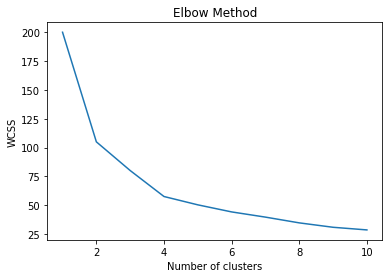

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=50)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=50)

In [9]:
clusters_new.labels_

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 3, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [10]:
#Assign clusters to the data set
crime['clusterid_new'] = clusters_new.labels_

In [13]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3


In [11]:
crime.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,10.815385,257.384615,76.000000,33.192308
